In [1]:
import numpy as np

In [4]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
        
    def forpass(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    def backprop(self, x, err):
        m = len(x)
        w_grad = np.dot(x.T, err) / m
        b_grad = np.sum(err) / m  # np.mean(err)
        return w_grad, b_grad
    
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a

    def predict(self, x):
        z = self.forpass(x)
        return z > 0
    def score(self, x, y):
        return np.mean(self.predict(x) == y.reshape(-1, 1))
    
    def fit(self, x, y, epochs = 100, random_state = None):
        y = y.reshape(-1,1) # 열 벡터로 변환
        m = len(x)
        self.w = np.ones((x.shape[1], 1)) # 가중치 초기화
        self.b = 0 # 절편 초기화
        for i in range(epochs):
            z = self.forpass(x)
            a = self.activation(z)
            err = -(y - a)
            w_grad, b_grad = self.backprop(x, err)
            self.w -= w_grad
            self.b -= b_grad
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.mean(-(y*np.log(a) + (1-y)*np.log(1-a))) 
            self.losses.append(loss)

In [5]:
class DualLayer(SingleLayer):
    def __init__(self, units = 10):
        self.units = units # 은닉층의 뉴런 개수
        self.w1 = None # 입력 > 은닉 가중치
        self.b1 = None # 입력 > 은닉 절편
        self.w2 = None # 은닉 > 출력 가중치
        self.b2 = None # 은닉 > 출력 절편
        self.a1 = None # 은닉층의 활성화 출력
        self.losses = []
    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.activation(np.dot(x, self.w1) + self.b1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        return z2
    def backprop(self, x, err):
        m = len(x)
        # 은닉층 > 출력층 가중치, 절편 업데이트
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 은닉층 오차
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 입력층 > 은닉층 가중치, 절편 업데이트
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad
    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))
        self.b1 = np.zeros(self.units)
        self.w2 = np.ones((self.units, 1))
        self.b2 = 0
    def training(self, x, y, m):
        z = self.forpass(x)
        a = self.activation(z)
        err = -(y - a)
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        self.w1 -= w1_grad
        self.b1 -= b1_grad
        self.w2 -= w2_grad
        self.b2 -= b2_grad
        return a
    def fit(self, x, y, epochs = 100):
        y = y.reshape(-1,1)
        m = len(x)
        self.init_weights(x.shape[1])
        for i in range(epochs):
            a = self.training(x, y, m)
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-(y * np.log(a) + (1 - y) * np.log(1 - a)))
            self.losses.append(loss / m)

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

0.956140350877193


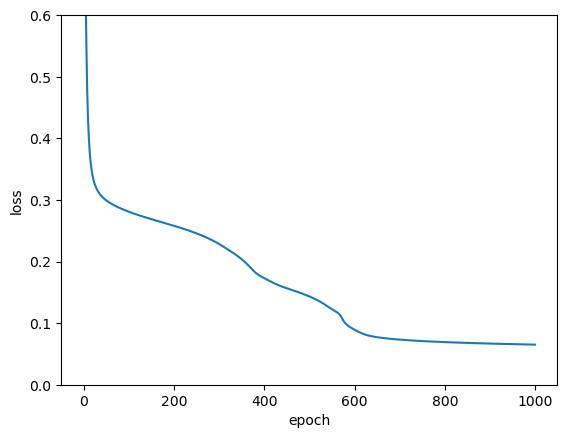

0.06507748756174721


In [17]:
dual_layer = DualLayer(units=8)
dual_layer.fit(X_train_scaled, y_train, epochs=1000)
print(dual_layer.score(X_test_scaled, y_test))

plt.plot(dual_layer.losses)
plt.ylim(0,0.6)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print(dual_layer.losses[-1])


In [12]:
# sigmoid(sigmoid(w1 * x + b1) * w2 + b2) > 0 ~ 1  > 0.5 : True, <= 0.5 : False
 
dual_layer.predict(X_test_scaled)

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [

In [13]:
layer = SingleLayer()
layer.fit(X_train_scaled, y_train, epochs=1000)
print(layer.score(X_test_scaled, y_test))

0.9649122807017544


In [18]:
class RandomInitNetwork(DualLayer):
    def init_weights(self, n_features):
        # 랜덤값 고정
        np.random.seed(0)
        # 평균이 0, 표준편차가 1인 수로 랜덤하게 생성
        self.w1 = np.random.normal(0, 1, (n_features, self.units))
        self.b1 = np.random.normal(0, 0.5, (self.units))
        self.w2 = np.random.normal(0, 1, (self.units, 1))
        self.b2 = 0


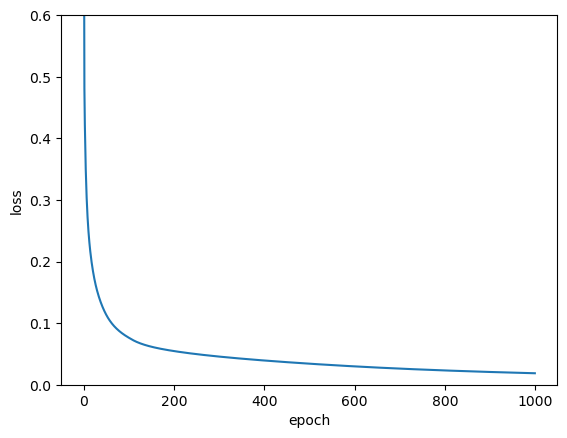

0.01861911053339142


In [19]:
random_init_net = RandomInitNetwork()
random_init_net.fit(X_train_scaled, y_train, epochs = 1000)
plt.plot(random_init_net.losses)
plt.ylim(0,0.6)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print(random_init_net.losses[-1])

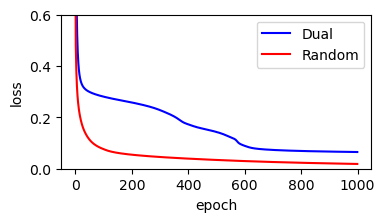

In [20]:
plt.figure(figsize = (4,2))
plt.plot(dual_layer.losses, 'b', label = 'Dual')
plt.plot(random_init_net.losses, 'r', label = 'Random')
plt.ylim(0,0.6)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


In [55]:
class MultiClassNetwork:
    def __init__(self, units = 10): # 전과 동일
        self.units = units 
        self.w1 = None 
        self.b1 = None 
        self.w2 = None 
        self.b2 = None 
        self.a1 = None 
        self.losses = []
    def forpass(self, x): 
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.sigmoid(z1) # 활성 함수 이름 변경
        z2 = np.dot(self.a1, self.w2) + self.b2
        return z2
    def backprop(self, x, err): # 전과 동일
        m = len(x)
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad
    def sigmoid(self, z): # 시그모이드 함수
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a

    def softmax(self, z): #소프트맥스 함수
        z = np.clip(z, -100, None)
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis = 1).reshape(-1, 1)
    def init_weights(self, n_features, n_classes): # 클래스 개수 받음
        np.random.seed(0)
        self.w1 = np.random.normal(0, 1, (n_features, self.units))
        self.b1 = np.zeros(self.units)
        self.w2 = np.random.normal(0, 1, (self.units, n_classes)) # 클래스 개수 포함
        self.b2 = np.zeros(n_classes) # 클래스 개수 포함

    def training(self, x, y, m):
        z = self.forpass(x)
        a = self.softmax(z) # 출력 계층 활성 함수 변경
        err = -(y - a)
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        self.w1 -= w1_grad
        self.b1 -= b1_grad
        self.w2 -= w2_grad
        self.b2 -= b2_grad
        return a
    def fit(self, x, y, epochs = 100):
        m = len(x)
        self.init_weights(x.shape[1], y.shape[1]) # 가중치 초기화시 클래스 개수 포함
        for I in range(epochs): 
            print('.', end='') # epochs 1번마다 . 찍음
            a = self.training(x, y, m)
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-y * np.log(a)) # 크로스 엔트로피 손실 함수
            self.losses.append(loss / m)
    def predict(self, x):
        z = self.forpass(x)
        return np.argmax(z, axis = 1) # 예측한 결과에서 가장 큰 확률 인덱스
    def score(self, x, y):
        # 정답 인덱스 확인
        return np.mean(self.predict(x) == np.argmax(y, axis = 1))

In [56]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [57]:
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder()
y_enc = oh_enc.fit_transform(y.reshape(-1,1)).toarray()

In [59]:
y_enc

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size = 0.2, 
                                                    random_state=0)

In [61]:
multi = MultiClassNetwork(units=128)
multi.fit(X_train, y_train, epochs=1000)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

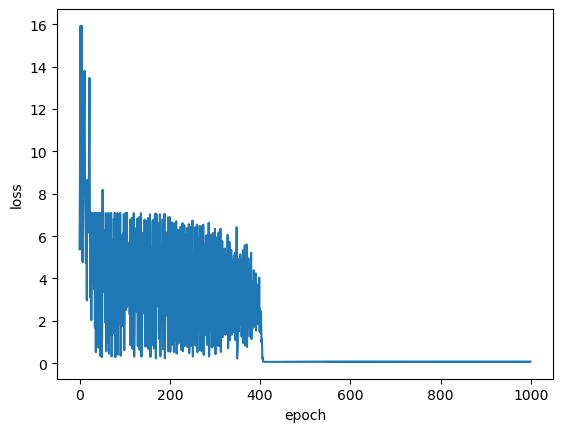

0.07216603920255983


In [62]:
plt.plot(multi.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
print(multi.losses[-1])

In [69]:
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [66]:
np.argmax(y_test, axis = 1)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score

pred = multi.predict(X_test)
accuracy_score(np.argmax(y_test, axis = 1), pred)

0.9666666666666667